# Boundary Box (B)

In [28]:
import numpy as np
import math

alpha = 0.1
lamb = np.random.beta(alpha, alpha)
cut_rat = np.sqrt(1-lamb)

def bounding_box(W, H):
    cut_w = int(W*cut_rat)
    cut_h = int(H*cut_rat)

    # uniform distribution
    cx = np.random.randint(W)
    cy = np.random.randint(H)

    rx = np.clip(cx-cut_w//2, 0, W)
    ry = np.clip(cy-cut_h//2, 0, H)
    rh = np.clip(cx+cut_w//2, 0, W)
    rw = np.clip(cy+cut_h//2, 0, H)
    
    return [rx, ry, rh, rw]

# 이미지 불러와서 resize

In [86]:
import cv2

img = cv2.imread('1.jpeg')
img2 = cv2.imread('2.jpg')
img = cv2.resize(img, dsize=(500, 500))
img2 = cv2.resize(img2, dsize=(500, 500))

# 생성한 bounding_box로 새로운 데이터 생성

In [87]:
B1 = bounding_box(img.shape[0], img.shape[1])
B2 = bounding_box(img2.shape[0], img2.shape[1])

In [88]:
crop_img = img[B1[0]:B1[2], B1[1]:B1[3]]

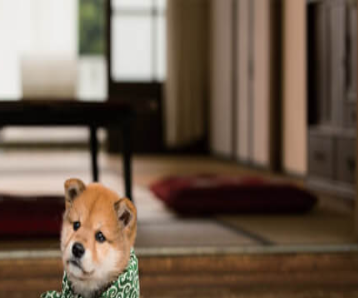

In [89]:
from google.colab.patches import cv2_imshow

cv2_imshow(crop_img)

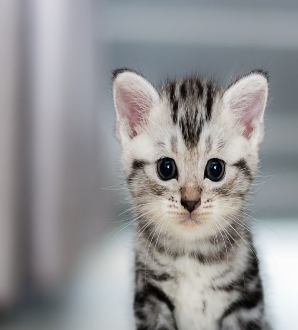

In [90]:
crop_img2 = img2[B2[0]:B2[2], B2[1]:B2[3]]

cv2_imshow(crop_img2)

In [91]:
img2[B1[0]:B1[2], B1[1]:B1[3]] = crop_img

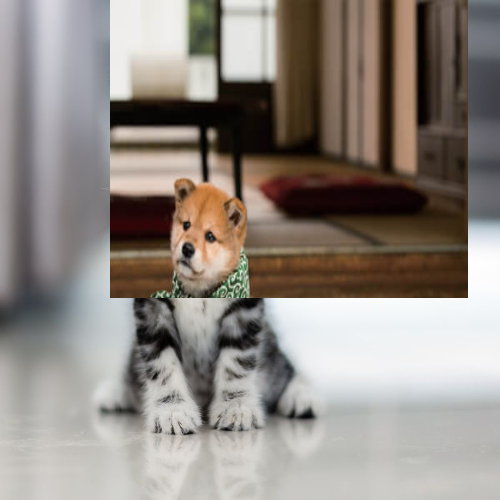

In [92]:
cv2_imshow(img2)

In [100]:
total = img2.shape[0]*img2.shape[1]

In [104]:
c_img_ratio = np.round((crop_img.shape[0]*crop_img.shape[1])/total, 1)

In [105]:
c_img_ratio

0.4

In [107]:
c_img2_ratio = 1-c_img_ratio
c_img2_ratio

0.6